<a href="https://colab.research.google.com/github/may-cbcp/diss/blob/main/notebook/diss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

arquivo = "/content/drive/MyDrive/drive-rafael/ACT-A/tabelas/2023Jun01-ACT-A_Commitment_Tracker.xlsx"
nome_aba = "Overall"
act_a = pd.read_excel(arquivo, skiprows=2, sheet_name=nome_aba)

Mounted at /content/drive


In [21]:
act_a

,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Unicef,GFF,MPP,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments
0,Total,NaN,24150.932500,17765.818906,6246.172792,138.940803,1875.820408,12900.274406,452.5380,244.311917,...,1604.958579,152.8,33.19,97.561798,16352.632651,1746.332557,1442.316337,2428.016303,2181.634652,NaN
1,Public donors Sub-total,NaN,22024.994496,15808.034205,6092.054707,124.905584,1804.281287,12371.294564,86.6685,209.311917,...,1352.060806,152.8,33.19,97.561798,15568.884584,1343.024790,1202.424187,1970.541761,1940.119175,NaN
2,United States of America,Public,7547.480883,6839.255228,692.298710,15.926945,50.000000,4000.000000,0.0000,0.000000,...,334.179989,0.0,0.00,0.000000,4352.341489,806.250000,865.500000,1126.576825,396.812569,The US will release an additional US$ 1.5 bill...
3,Team Europe,Public,7494.655565,4594.882955,2884.056810,15.715800,783.898801,4303.491461,0.9685,95.301825,...,318.759741,46.6,20.74,0.000000,5714.051456,153.677014,195.645706,439.380717,991.900672,NaN
4,Germany,Public,3948.468521,2599.043644,1333.912985,15.511892,486.578802,1659.678482,0.0000,42.700000,...,265.493047,0.0,0.00,0.000000,2761.060051,99.868164,187.634621,303.867027,596.038658,Gavi figures include the pro-rata share of una...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,World Food Programme,Multilateral,0.299044,0.000000,0.299044,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.299044,NaN
121,WHO flexible funding,Multilateral,352.729764,352.729764,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.00,0.000000,8.079692,7.217160,4.086691,112.838379,220.507842,The allocation of flexible contributions to WH...
122,Asian Development Bank,Multilateral,2.720400,0.000000,2.720400,0.000000,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.00,0.000000,0.520000,0.000000,0.000000,0.000000,2.200400,NaN
123,World Bank,Multilateral,12.007881,0.000000,0.000000,12.007881,0.000000,0.000000,0.0000,0.000000,...,0.000000,0.0,0.00,0.000000,0.000000,0.000000,0.000000,9.000000,3.007881,NaN


In [22]:
arquivo = "/content/drive/MyDrive/drive-rafael/ACT-A/tabelas/origem-privados.xlsx"
nome_aba = "aba_01"
privados = pd.read_excel(arquivo, skiprows=0, sheet_name=nome_aba)
privados

,Donor,Origin
0,Asia-Europe Foundation (ASEF),Singapore
1,Bill & Melinda Gates Foundation,United States of America
2,Gates Philanthropy Partners,United States of America
3,Mastercard,United States of America
4,Wellcome Trust,United Kingdom
5,Anonymous Swiss Foundation,Switzerland
6,Reed Hastings and Patty Quillin,United States of America
7,Gamers without borders,Saudi Arabia
8,Shell,United Kingdom
9,Rockefeller,United States of America


In [23]:
doadores_privados_origem = pd.merge(act_a, privados, on="Donor")
doadores_privados_origem = doadores_privados_origem.sort_values(by="TOTAL ACT-A funding", ascending=False)


In [24]:

df = doadores_privados_origem

# Selecionar os top 5 doadores
top5 = df.head(5)

# Criar o gráfico de barras horizontais invertidas
grafico_top5 = px.bar(top5, x='TOTAL ACT-A funding', y='Donor',
                      title='Maiores doadores privados do ACT-A até outubro de 2022',
                      height=650, log_x=True, orientation='h')  # Usar escala logarítmica para o eixo x e orientação horizontal

# Atualizar as configurações do gráfico
grafico_top5.update_traces(marker_color='gray', texttemplate='%{x:.2f}', textposition='outside')
grafico_top5.update_layout(plot_bgcolor='whitesmoke')

# Exibir o gráfico
grafico_top5.show()


In [34]:
restante = df.tail(len(df) - 5)
grafico_restante = px.bar(restante,x='Donor', y='TOTAL ACT-A funding', title='Doadores privados do ACT-A até outubro de 2022, isentos os cinco maiores',height=650)
grafico_restante.update_traces(marker_color='gray',texttemplate='%{y:.2f}', textposition='outside')
grafico_restante.update_layout(plot_bgcolor='whitesmoke')

In [26]:
!pip install geopy
from geopy.geocoders import Nominatim

def obter_coordenadas_por_pais(nome_do_pais):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(nome_do_pais)

    if location:
        latitude = location.latitude
        longitude = location.longitude
        return latitude, longitude
    else:
        return None,None

In [27]:
df = doadores_privados_origem
df['Latitude'], df['Longitude'] = zip(*df['Origin'].apply(obter_coordenadas_por_pais).tolist())

lalo = df

In [28]:
lalo

,Donor,Type,TOTAL ACT-A funding,2020-21 financial contributions,2021-22 financial contributions,2022-23 financial contributions,CEPI,Gavi,Therapeutics Accelerator,Unitaid,...,Pending Allocation to/by Agency,Vaccines,Therapeutics,Diagnostics,Health Systems,Pending Allocation to/by Pillars,Comments,Origin,Latitude,Longitude
1,Bill & Melinda Gates Foundation,Private,448.886229,448.636229,0.250000,0.00000,19.999978,236.250000,190.0000,0.0,...,0.0,257.030083,190.285111,0.307027,1.014009,0.25,Gavi figures include the pro-rata share of una...,United States of America,39.783730,-100.445882
2,Gates Philanthropy Partners,Private,118.869500,118.869500,0.000000,0.00000,0.000000,18.000000,100.8695,0.0,...,0.0,18.000000,100.869500,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
4,Wellcome Trust,Private,79.643427,75.000000,3.811007,0.83242,25.000000,0.000000,50.0000,0.0,...,0.0,25.000000,50.000000,3.811007,0.832420,0.00,NaN,United Kingdom,54.702354,-3.276575
3,Mastercard,Private,53.305266,53.305266,0.000000,0.00000,0.000000,28.305266,25.0000,0.0,...,0.0,28.305266,25.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
6,Reed Hastings and Patty Quillin,Private,30.000000,30.000000,0.000000,0.00000,0.000000,30.000000,0.0000,0.0,...,0.0,30.000000,0.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
0,Asia-Europe Foundation (ASEF),Private,10.000000,0.000000,0.000000,10.00000,0.000000,0.000000,0.0000,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NGR = Non gap reducing,Singapore,1.357107,103.819499
8,Shell,Private,10.000000,10.000000,0.000000,0.00000,0.000000,10.000000,0.0000,0.0,...,0.0,10.000000,0.000000,0.000000,0.000000,0.00,NaN,United Kingdom,54.702354,-3.276575
9,Rockefeller,Private,10.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.0,...,0.0,0.000000,0.000000,10.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
10,Twilio,Private,10.000000,10.000000,0.000000,0.00000,0.000000,10.000000,0.0000,0.0,...,0.0,10.000000,0.000000,0.000000,0.000000,0.00,NaN,United States of America,39.783730,-100.445882
11,Avast,Private,7.999959,7.999959,0.000000,0.00000,7.999959,0.000000,0.0000,0.0,...,0.0,7.999959,0.000000,0.000000,0.000000,0.00,NaN,Czech Republic,49.743905,15.338106


In [29]:
df = lalo

soma_por_pais = df.groupby('Origin').agg({'TOTAL ACT-A funding': 'sum', 'Donor': 'count'}).reset_index()
soma_por_pais = soma_por_pais.rename(columns={'TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Donor': 'Total de Doadores'})
soma_por_pais = soma_por_pais.sort_values(by='Soma TOTAL ACT-A funding', ascending=False)
soma_por_pais

,Origin,Soma TOTAL ACT-A funding,Total de Doadores
7,United States of America,701.739046,15
6,United Kingdom,94.643751,3
4,Singapore,16.500000,3
1,Czech Republic,7.999959,1
5,Switzerland,4.641992,4
0,Canada,3.932054,1
3,Saudi Arabia,2.304500,1
2,Japan,1.141683,1


In [30]:
import locale
df = lalo
locale.setlocale(locale.LC_NUMERIC, '')
soma_por_pais = df.groupby('Origin').agg({'TOTAL ACT-A funding': 'sum', 'Donor': 'count'}).reset_index()
soma_por_pais = soma_por_pais.rename(columns={'TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Donor': 'Total de Doadores'})
soma_por_pais = soma_por_pais.sort_values(by='Soma TOTAL ACT-A funding', ascending=False)
soma_por_pais['Soma TOTAL ACT-A funding'] = soma_por_pais['Soma TOTAL ACT-A funding']
soma_por_pais

,Origin,Soma TOTAL ACT-A funding,Total de Doadores
7,United States of America,701.739046,15
6,United Kingdom,94.643751,3
4,Singapore,16.500000,3
1,Czech Republic,7.999959,1
5,Switzerland,4.641992,4
0,Canada,3.932054,1
3,Saudi Arabia,2.304500,1
2,Japan,1.141683,1


In [31]:
# Criar o gráfico de barras agrupadas com escala logarítmica no eixo y
fig = px.bar(soma_por_pais, x='Origin', y='Soma TOTAL ACT-A funding', color='Total de Doadores',
             title='Relação entre Origin, Soma TOTAL ACT-A funding e Total de Doadores',
             labels={'Soma TOTAL ACT-A funding': 'Soma TOTAL ACT-A funding', 'Total de Doadores': 'Total de Doadores'},
             log_y=True)  # Usar escala logarítmica para o eixo y

# Exibir o gráfico
fig.show()

In [32]:
fig = px.scatter_geo(soma_por_pais, locations='Origin', locationmode='country names',
                     size='Soma TOTAL ACT-A funding', color='Total de Doadores',
                     projection='natural earth', title='Scatter_geo - Soma de TOTAL ACT-A funding e Total de Doadores por País')

# Exibir o gráfico
fig.show()

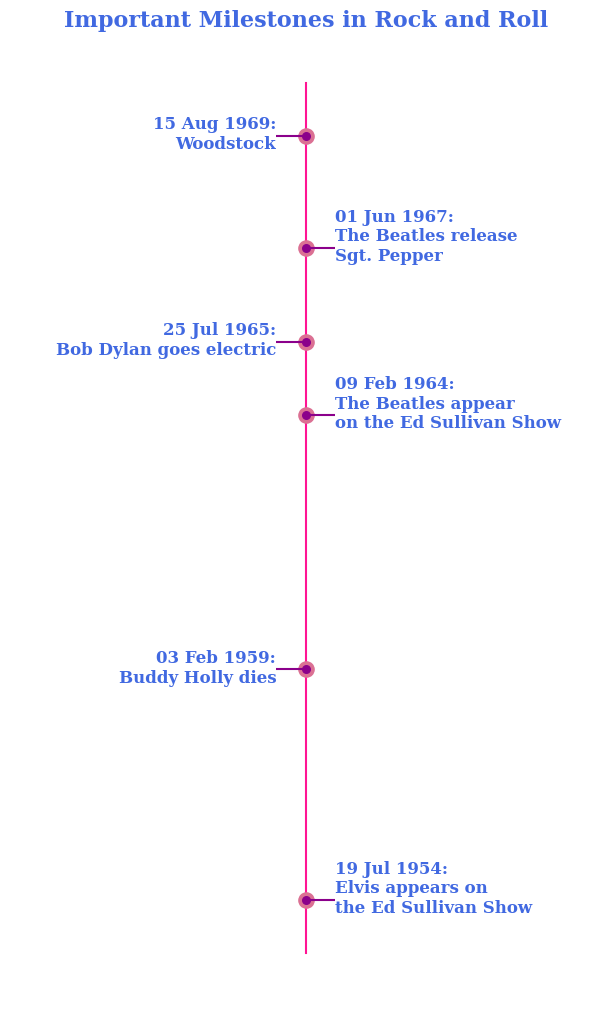

In [33]:
import matplotlib.pyplot as plt
from datetime import date,timedelta
import numpy as np

%matplotlib inline

# reference: https://mentalitch.com/key-events-in-rock-and-roll-history/
dates = [date(1954, 7, 19), date(1959, 2, 3), date(1964, 2, 9), date(1965, 7, 25), date(1967, 6, 1), date(1969, 8, 15)]
min_date = date(np.min(dates).year - 2, np.min(dates).month, np.min(dates).day)
max_date = date(np.max(dates).year + 2, np.max(dates).month, np.max(dates).day)

labels = ['Elvis appears on\nthe Ed Sullivan Show', 'Buddy Holly dies', 'The Beatles appear\non the Ed Sullivan Show',
          'Bob Dylan goes electric', 'The Beatles release\nSgt. Pepper', 'Woodstock']
# labels with associated dates
labels = ['{0:%d %b %Y}:\n{1}'.format(d, l) for l, d in zip (labels, dates)]

fig, ax = plt.subplots(figsize=(6, 10), constrained_layout=True)
_ = ax.set_xlim(-20, 20)
_ = ax.set_ylim(min_date, max_date)
_ = ax.axvline(0, ymin=0.05, ymax=0.95, c='deeppink', zorder=1)

_ = ax.scatter(np.zeros(len(dates)), dates, s=120, c='palevioletred', zorder=2)
_ = ax.scatter(np.zeros(len(dates)), dates, s=30, c='darkmagenta', zorder=3)

label_offsets = np.repeat(2.0, len(dates))
label_offsets[1::2] = -2.0
for i, (l, d) in enumerate(zip(labels, dates)):
    d = d - timedelta(days=90)
    align = 'right'
    if i % 2 == 0:
        align = 'left'
    _ = ax.text(label_offsets[i], d, l, ha=align, fontfamily='serif', fontweight='bold', color='royalblue',fontsize=12)



    stems = np.repeat(2.0, len(dates))
stems[1::2] *= -1.0
x = ax.hlines(dates, 0, stems, color='darkmagenta')


# hide lines around chart
for spine in ["left", "top", "right", "bottom"]:
    _ = ax.spines[spine].set_visible(False)

# hide tick labels
_ = ax.set_xticks([])
_ = ax.set_yticks([])

_ = ax.set_title('Important Milestones in Rock and Roll', fontweight="bold", fontfamily='serif', fontsize=16,
                 color='royalblue')